# 1) Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Data Reading

In [ ]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 3) Data Cleaning

In [ ]:
df.info() # Infomation Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe() # Describe Data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.duplicated().sum() # Check the Duplicated Values

0

In [ ]:
df.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True) # Drop Unimportant columns 

In [ ]:
df.head() # Check is Dropet or Not 

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Convert string to integers

from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,4,58138.0,0,0,80,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,4,46344.0,1,1,157,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,5,71613.0,0,0,444,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,5,26646.0,1,0,199,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,4,3,58293.0,1,0,390,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,272,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,4,5,64014.0,2,1,207,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,2,2,56981.0,0,0,521,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,3,5,69245.0,0,1,500,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
df.isna().sum() # Check the NULL Values

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
df.dropna(inplace=True) # The Null must be removed for the Model to work.

In [ ]:
df.isna().sum() 

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan) # Replace inf and -inf with NaN

In [ ]:
df.dropna(inplace=True)

# 4) Drop Outliers

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "Response" in numeric_cols:
    numeric_cols.remove("Response")

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
mask = ~(((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1))
rows_before = df.shape[0]
df_clean = df[mask].reset_index(drop=True)
rows_after = df_clean.shape[0] 

# 5) Data Normalization / Scaling

In [ ]:
X = df.drop(columns=["Response"])  
X

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,1957,2,4,58138.0,0,0,80,58,635,88,...,8,10,4,7,0,0,0,0,0,0
1,1954,2,4,46344.0,1,1,157,38,11,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,2,5,71613.0,0,0,444,26,426,49,...,8,2,10,4,0,0,0,0,0,0
3,1984,2,5,26646.0,1,0,199,26,11,4,...,2,0,4,6,0,0,0,0,0,0
4,1981,4,3,58293.0,1,0,390,94,173,43,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,272,46,709,43,...,9,3,4,5,0,0,0,0,0,0
2236,1946,4,5,64014.0,2,1,207,56,406,0,...,8,2,5,7,0,0,0,1,0,0
2237,1981,2,2,56981.0,0,0,521,91,908,48,...,2,3,13,6,0,1,0,0,0,0
2238,1956,3,5,69245.0,0,1,500,8,428,30,...,6,5,10,3,0,0,0,0,0,0


In [ ]:
y = df["Response"]
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2216, dtype: int64

In [ ]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
X_scaled = X.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
print("✅ Scaling applied on numeric columns only")
X_scaled.head()

✅ Scaling applied on numeric columns only


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,-1.306327,0.310532,0.978226,1.549429,...,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
1,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.901056,-0.380509,-0.872024,-0.637328,...,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
2,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.609497,-0.795134,0.358511,0.569159,...,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
3,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.680000,-0.795134,-0.872024,-0.561922,...,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
4,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,0.325281,1.554407,-0.391671,0.418348,...,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812


# 6) PCA / Feature Engineering

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),   
    ("pca", PCA(n_components=2))    
])

In [ ]:
X_pca_preview = pca_pipeline.fit_transform(X)
print("PCA-transformed shape:", X_pca_preview.shape)

PCA-transformed shape: (2216, 2)


# 7) Data Visualization

In [ ]:
corr = df.corr() # 

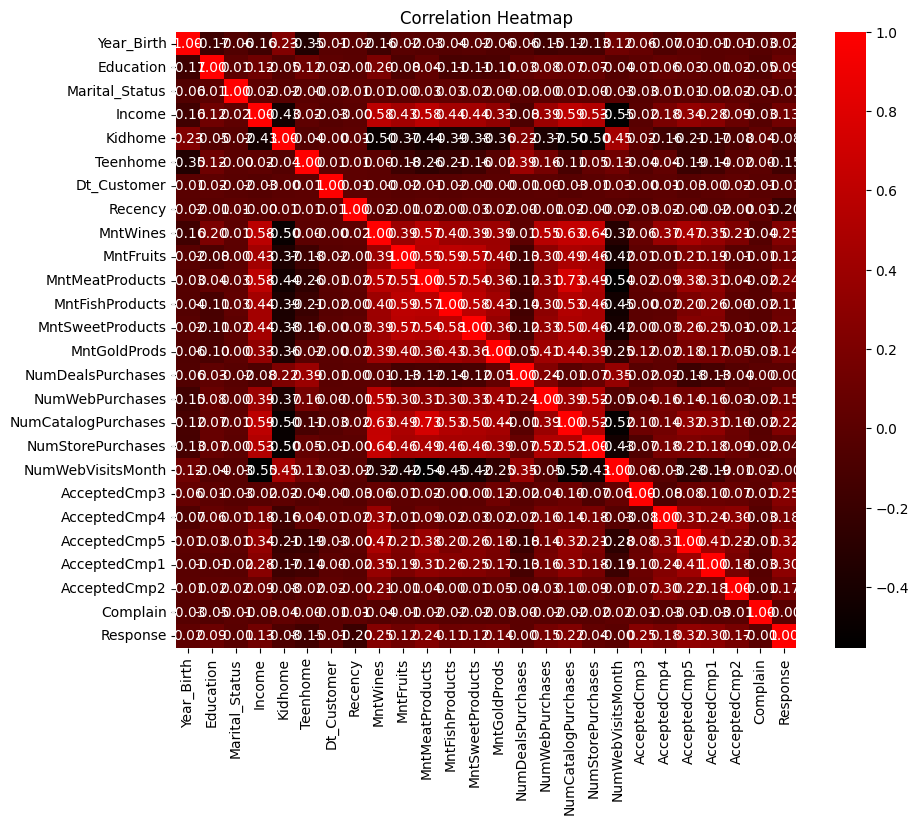

In [ ]:
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

black_red = LinearSegmentedColormap.from_list("black_red", ["black", "red"])
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap=black_red)
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


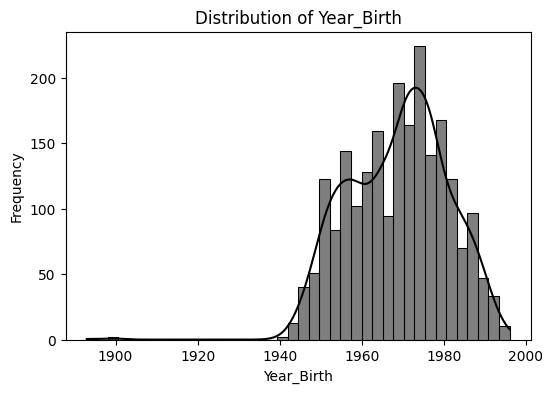

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


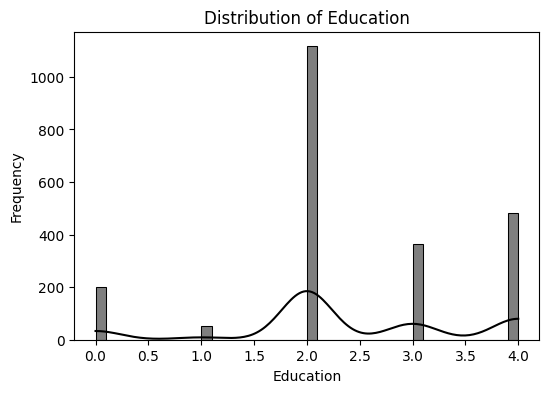

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


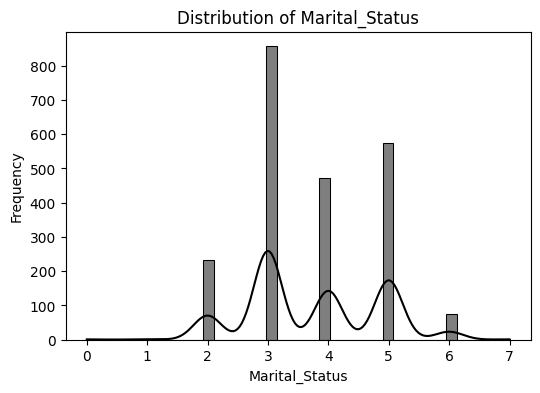

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


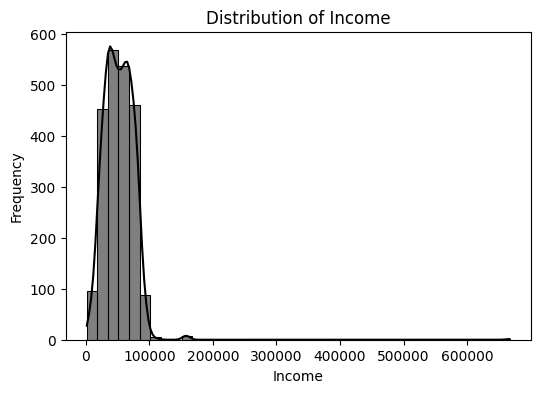

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


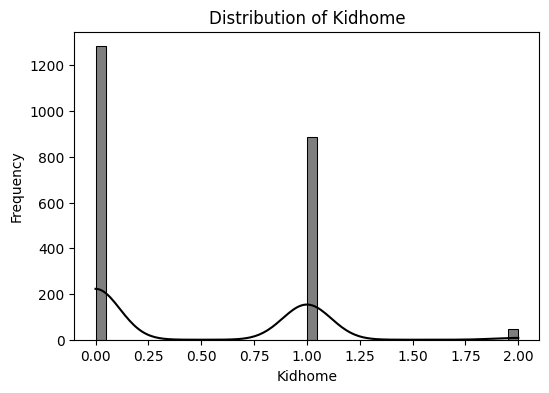

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


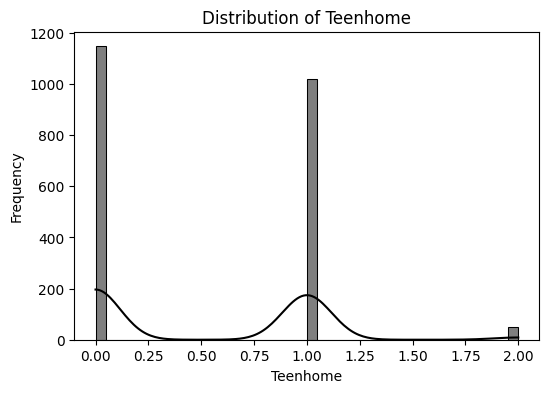

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


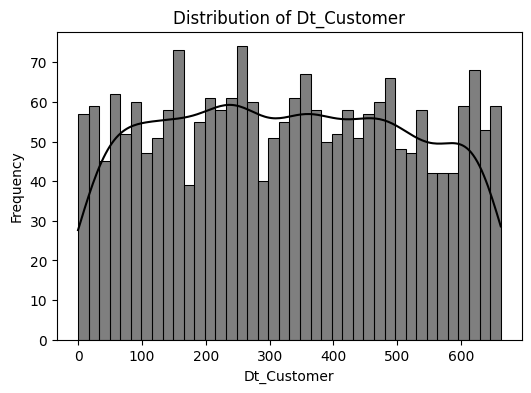

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


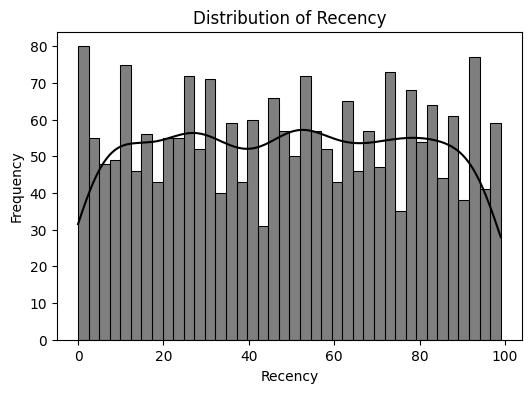

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


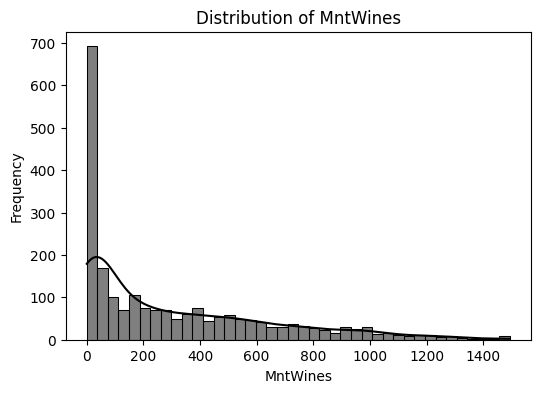

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


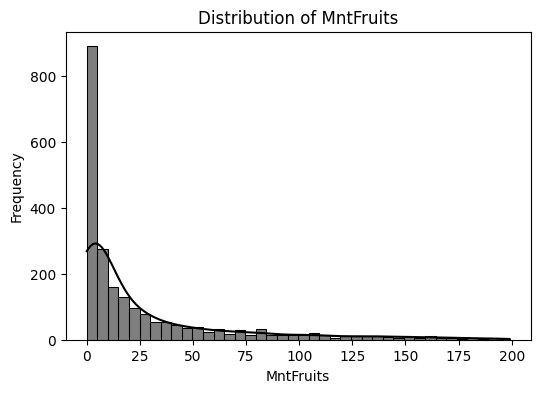

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


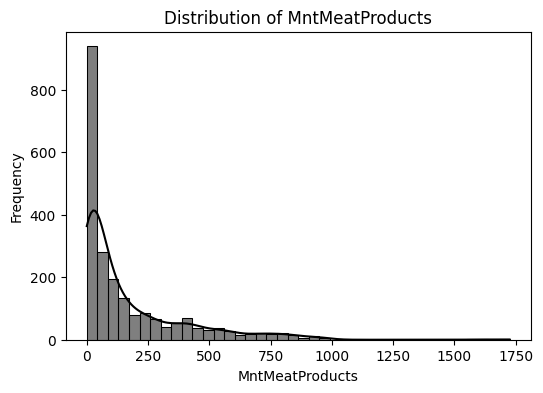

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


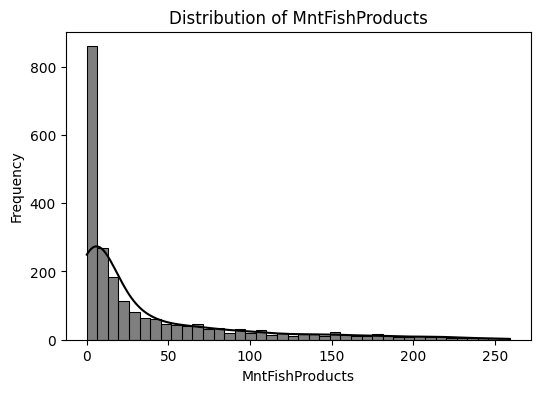

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


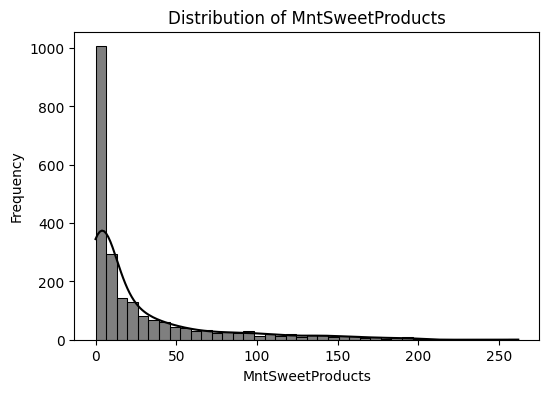

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


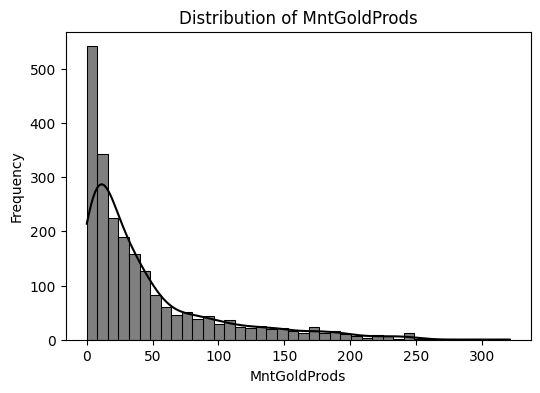

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


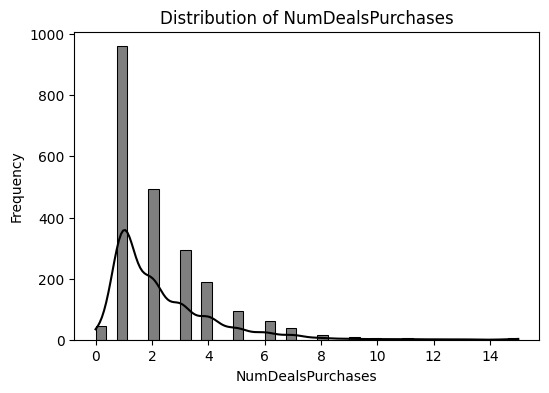

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


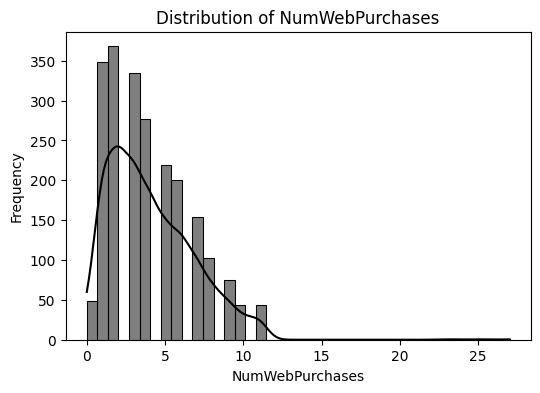

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


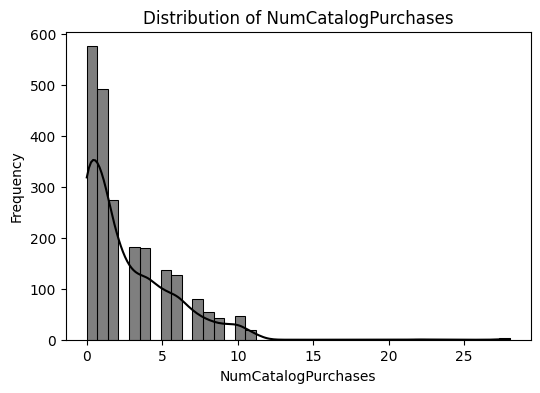

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


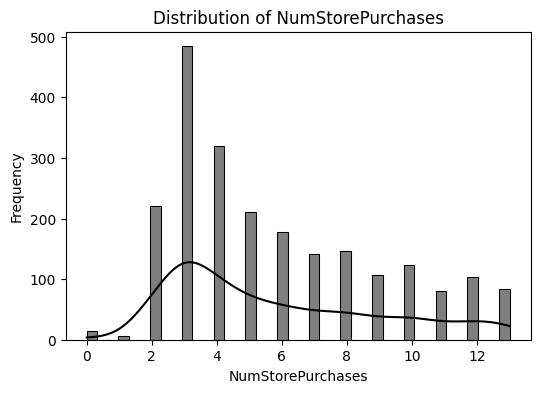

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


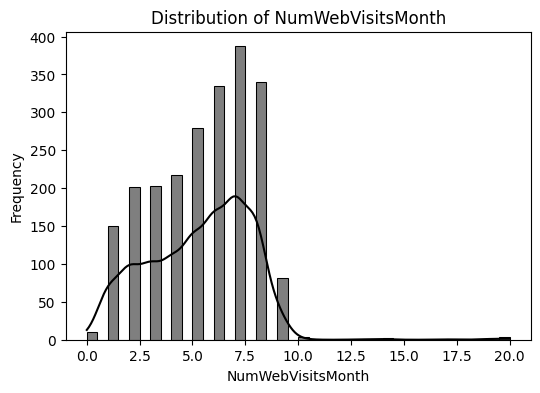

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


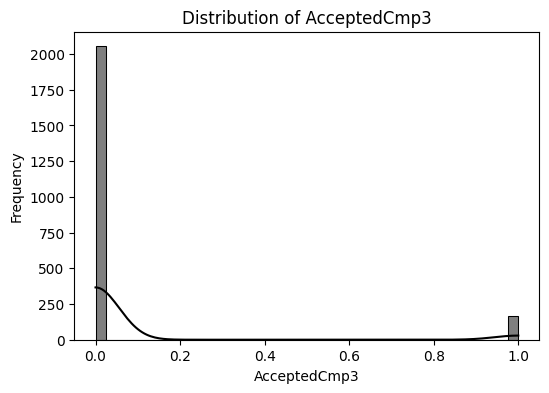

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


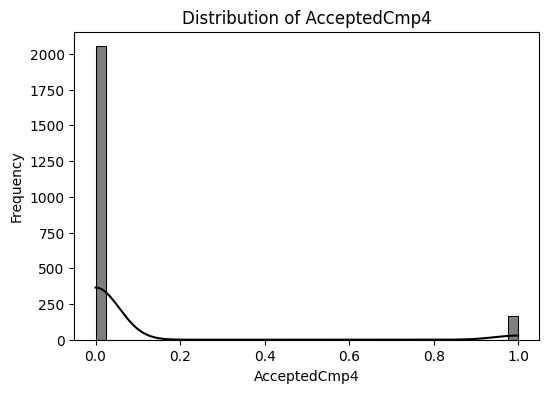

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


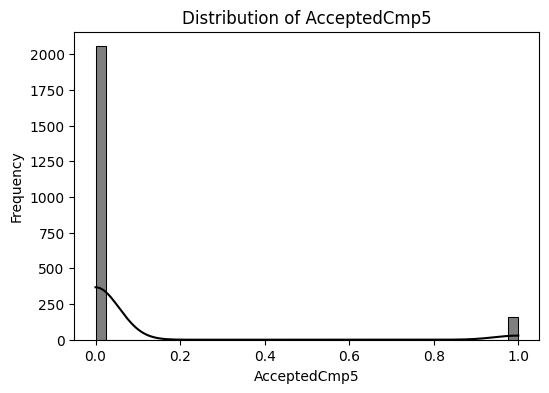

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


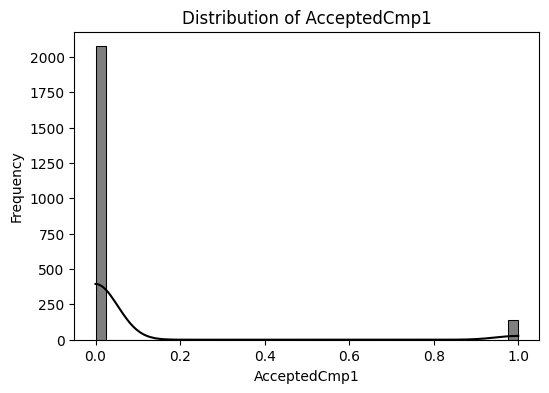

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


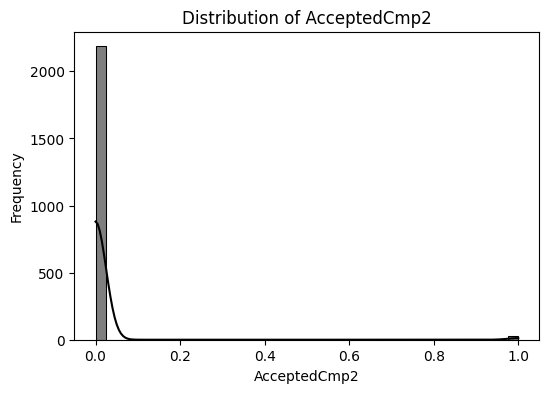

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


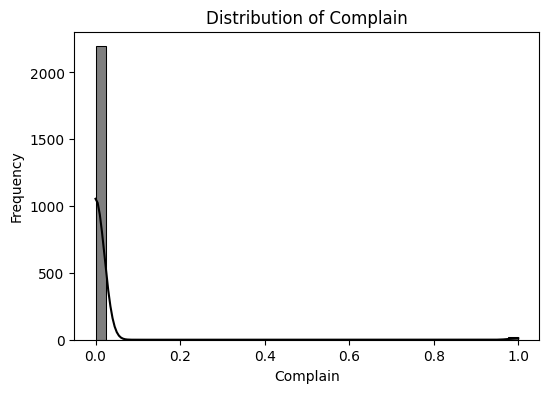

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


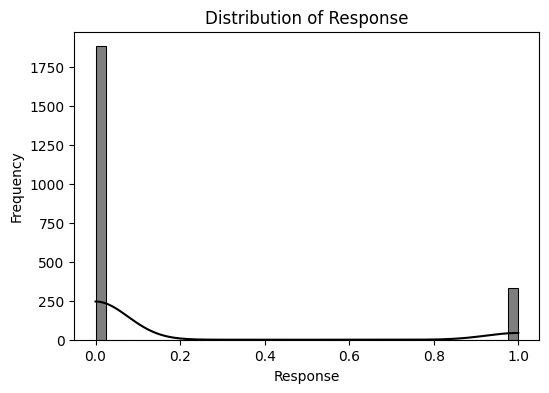

In [ ]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=40, kde=True, color="black") 
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

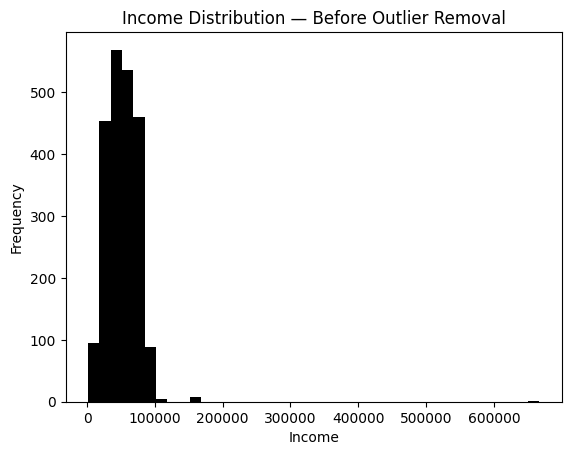

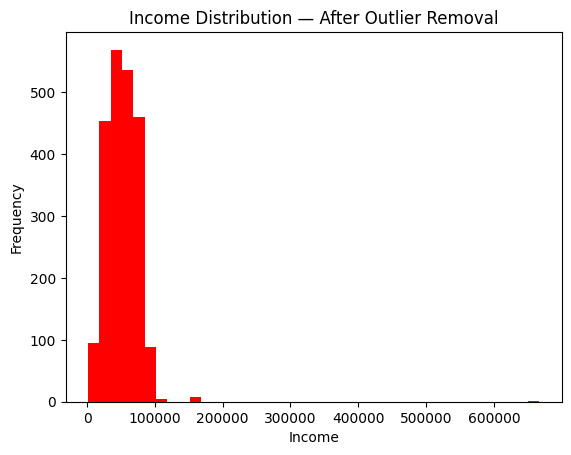

In [ ]:
df_raw = df.copy()

if "Income" in df.columns:
    plt.figure()
    df_raw["Income"].dropna().plot(kind="hist", bins=40, color="black")
    plt.title("Income Distribution — Before Outlier Removal")
    plt.xlabel("Income")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    df["Income"].dropna().plot(kind="hist", bins=40, color="red")
    plt.title("Income Distribution — After Outlier Removal")
    plt.xlabel("Income")
    plt.ylabel("Frequency")
    plt.show()

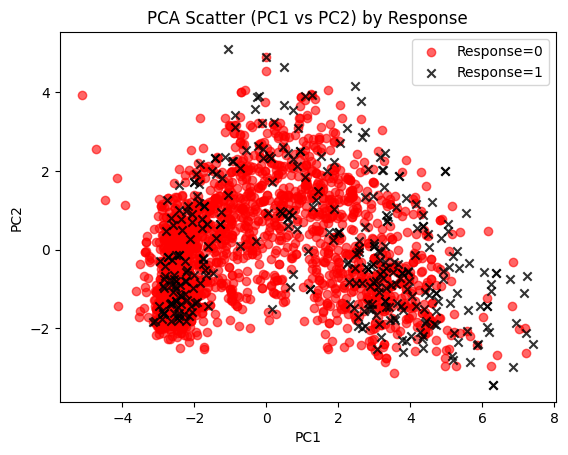

In [ ]:
X_pca = X_pca_preview 
PC1 = X_pca[:, 0]
PC2 = X_pca[:, 1]

plt.figure()
mask0 = (y.values == 0)
plt.scatter(PC1[mask0], PC2[mask0], label="Response=0", alpha=0.6, color="red")
mask1 = (y.values == 1)
plt.scatter(PC1[mask1], PC2[mask1], label="Response=1", alpha=0.8, marker='x', color="black")
plt.title("PCA Scatter (PC1 vs PC2) by Response")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# 8) Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBoost": XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R2": r2}
    
    print(f"{name}:")
    print(f"  Accuracy = {model.score(X_test, y_test) * 100}%")
    print(f"  MSE = {mse:.4f}")
    print(f"  R²  = {r2:.4f}")
    print("-" * 40)

best_model = max(results, key=lambda k: results[k]["R2"])
print(f"\nBest Model Summary: {best_model}")
print(f"\n✅ Best Model: {best_model} with R² = {results[best_model]['R2']:.4f}")

Linear Regression:
  Accuracy = 23.2968520365902%
  MSE = 0.0922
  R²  = 0.2330
----------------------------------------
Ridge Regression:
  Accuracy = 23.300101399911476%
  MSE = 0.0921
  R²  = 0.2330
----------------------------------------
Lasso Regression:
  Accuracy = -0.1471231048430166%
  MSE = 0.1203
  R²  = -0.0015
----------------------------------------
Elastic Net:
  Accuracy = -0.1471231048430166%
  MSE = 0.1203
  R²  = -0.0015
----------------------------------------
Decision Tree:
  Accuracy = -10.60631650059114%
  MSE = 0.1329
  R²  = -0.1061
----------------------------------------
XGBoost:
  Accuracy = 23.34254093653083%
  MSE = 0.0921
  R²  = 0.2334
----------------------------------------

Best Model Summary: XGBoost

✅ Best Model: XGBoost with R² = 0.2334


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    acc = model.score(X_test, y_test) 

    results[name] = {"Accuracy": acc, "MSE": mse, "R2": r2}

print("Model Comparison by Accuracy:")

pd.DataFrame(results).T.sort_values(
    by='Accuracy', ascending=False
).style.background_gradient(cmap=black_red).format({
    'Accuracy': "{:.2%}",
    'MSE': "{:.4f}",
    'R2': "{:.4f}"
})

Model Comparison by Accuracy:


,Accuracy,MSE,R2
XGBoost,23.34%,0.0921,0.2334
Ridge Regression,23.30%,0.0921,0.2330
Linear Regression,23.30%,0.0922,0.2330
Lasso Regression,-0.15%,0.1203,-0.0015
Elastic Net,-0.15%,0.1203,-0.0015
Decision Tree,-16.23%,0.1396,-0.1623


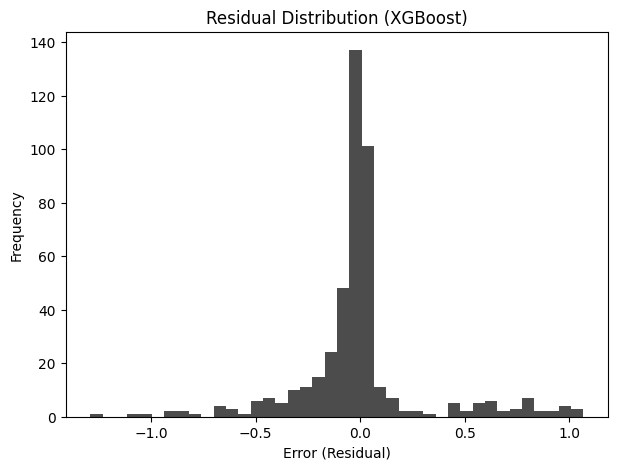

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=40, alpha=0.7, color="black")
plt.title(f"Residual Distribution ({best_model})")
plt.xlabel("Error (Residual)")
plt.ylabel("Frequency")
plt.show()